In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#for reading and handling the data
import pandas as pd
import numpy as np
import os

#for visualizinng and analyzing it
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_validate

#random forest model training
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

#ann training
import tensorflow
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError

from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD,Adam




#importing the data and data structure analysis



In [3]:
df = pd.read_csv("/content/dataset.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [ ]:
df.shape

(197428, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,196441.0,2.978706,1.524867,1.0,2.0,3.0,4.0,6.0
order_protocol,196433.0,2.882352,1.503771,1.0,1.0,3.0,4.0,7.0
total_items,197428.0,3.196391,2.666546,1.0,2.0,3.0,4.0,411.0
subtotal,197428.0,2682.331402,1823.093688,0.0,1400.0,2200.0,3395.0,27100.0
num_distinct_items,197428.0,2.670791,1.630255,1.0,1.0,2.0,3.0,20.0
min_item_price,197428.0,686.218470,522.038648,-86.0,299.0,595.0,949.0,14700.0
max_item_price,197428.0,1159.588630,558.411377,0.0,800.0,1095.0,1395.0,14700.0
total_onshift_partners,181166.0,44.808093,34.526783,-4.0,17.0,37.0,65.0,171.0
total_busy_partners,181166.0,41.739747,32.145733,-5.0,15.0,34.0,62.0,154.0
total_outstanding_orders,181166.0,58.050065,52.661830,-6.0,17.0,41.0,85.0,285.0


In [ ]:
df.describe(include = object).T

,count,unique,top,freq
created_at,197428,180985,2015-02-11 19:50:43,6
actual_delivery_time,197421,178110,2015-02-11 20:40:45,5
store_id,197428,6743,d43ab110ab2489d6b9b2caa394bf920f,937
store_primary_category,192668,74,american,19399


#Data preprocessing and feature engineering

In [ ]:
# checking for nulls
df.isna().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [ ]:
#Droping High Missing Values columns
print('NAN in total_onshift_partners :',(len(df['total_onshift_partners'])-df['total_onshift_partners'].isna().sum())/len(df['total_onshift_partners'])*100)
df.drop(['total_onshift_partners'],inplace=True,axis=1)
print('NAN in total_busy_partners :',(len(df['total_busy_partners'])-df['total_busy_partners'].isna().sum())/len(df['total_busy_partners'])*100)
df.drop(['total_busy_partners'],inplace=True,axis=1)
print('NAN in total_outstanding_orders :',(len(df['total_outstanding_orders'])-df['total_outstanding_orders'].isna().sum())/len(df['total_outstanding_orders'])*100)
df.drop(['total_outstanding_orders'],inplace=True,axis=1)

NAN in total_onshift_partners : 91.7630731203274
NAN in total_busy_partners : 91.7630731203274
NAN in total_outstanding_orders : 91.7630731203274


In [ ]:
#Filling missing values
df['store_primary_category'].value_counts()
df['store_primary_category']=df['store_primary_category'].fillna('Other')
df['market_id'].value_counts()
df['market_id']=df['market_id'].fillna('0.0',)
df['order_protocol'].value_counts()
df['order_protocol']=df['order_protocol'].fillna('0.0')
df.dropna(subset=['actual_delivery_time'],inplace=True)
df.isna().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 197421 entries, 0 to 197427
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   market_id               197421 non-null  object
 1   created_at              197421 non-null  object
 2   actual_delivery_time    197421 non-null  object
 3   store_id                197421 non-null  object
 4   store_primary_category  197421 non-null  object
 5   order_protocol          197421 non-null  object
 6   total_items             197421 non-null  int64 
 7   subtotal                197421 non-null  int64 
 8   num_distinct_items      197421 non-null  int64 
 9   min_item_price          197421 non-null  int64 
 10  max_item_price          197421 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 18.1+ MB


In [ ]:
#Creating the target column
df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])

df['time_taken_for_delivery']= (df["actual_delivery_time"]-df["created_at"]).dt.total_seconds()/60
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

In [ ]:
#Dropping the Column that are no longer required
df.drop(['created_at','actual_delivery_time','store_id'],axis=1,inplace=True)


In [ ]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,time_taken_for_delivery,hour,day
0,1.0,american,1.0,4,3441,4,557,1239,62.983333,22,4
1,2.0,mexican,2.0,1,1900,1,1400,1400,67.066667,21,1
2,3.0,Other,1.0,1,1900,1,1900,1900,29.683333,20,3
3,3.0,Other,1.0,6,6900,5,600,1800,51.250000,21,1
4,3.0,Other,1.0,3,3900,3,1100,1600,39.833333,2,6


In [ ]:
#Encoding categorical columns
df["market_id"] = df["market_id"].astype(float)
df["order_protocol"] = df["order_protocol"].astype(float)
df['store_primary_category']=df['store_primary_category'].astype('category').cat.codes

df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,time_taken_for_delivery,hour,day
0,1.0,5,1.0,4,3441,4,557,1239,62.983333,22,4
1,2.0,48,2.0,1,1900,1,1400,1400,67.066667,21,1
2,3.0,0,1.0,1,1900,1,1900,1900,29.683333,20,3
3,3.0,0,1.0,6,6900,5,600,1800,51.250000,21,1
4,3.0,0,1.0,3,3900,3,1100,1600,39.833333,2,6


In [ ]:
df.shape

(166590, 11)

#Outlier Handling

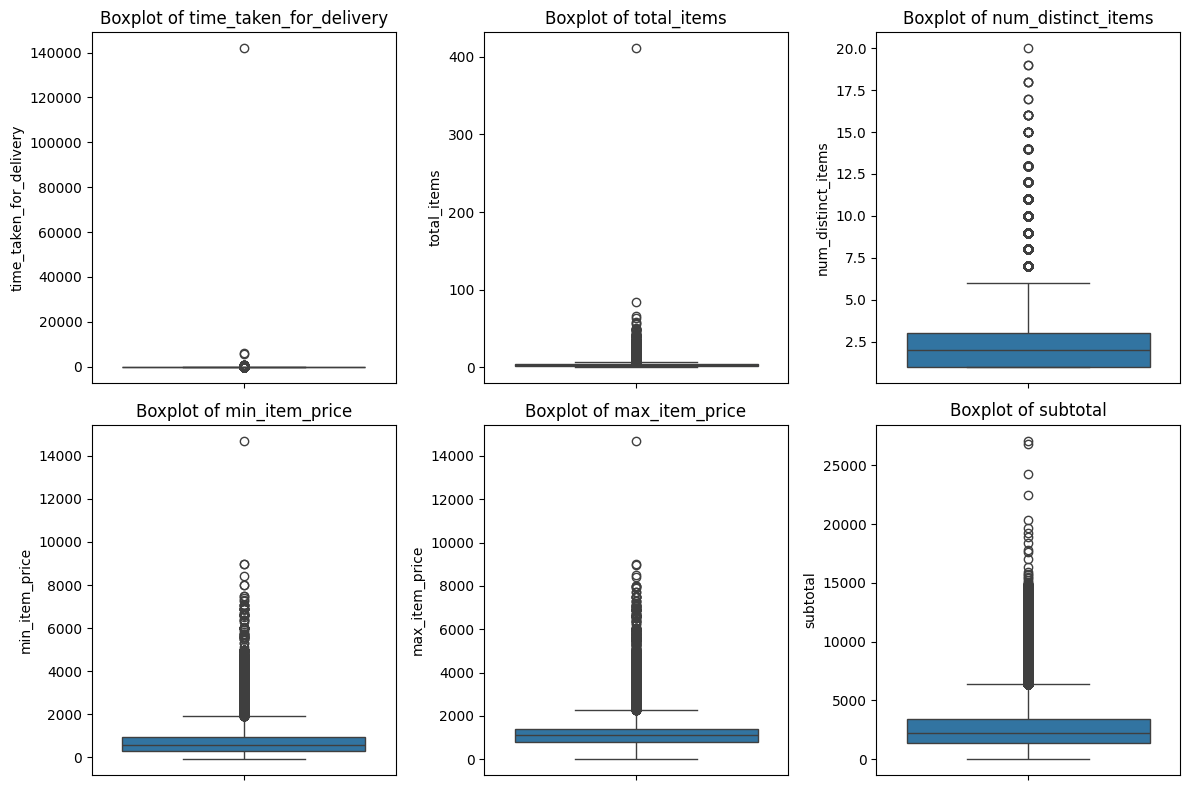

In [ ]:

# Outlier check using Boxplot

columns= ['time_taken_for_delivery', 'total_items', 'num_distinct_items','min_item_price', 'max_item_price', 'subtotal']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

axes = axes.flatten()

for ax, var in zip(axes, columns):
    sns.boxplot(data=df, y=var, ax=ax)
    ax.set_title(f'Boxplot of {var}')
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()


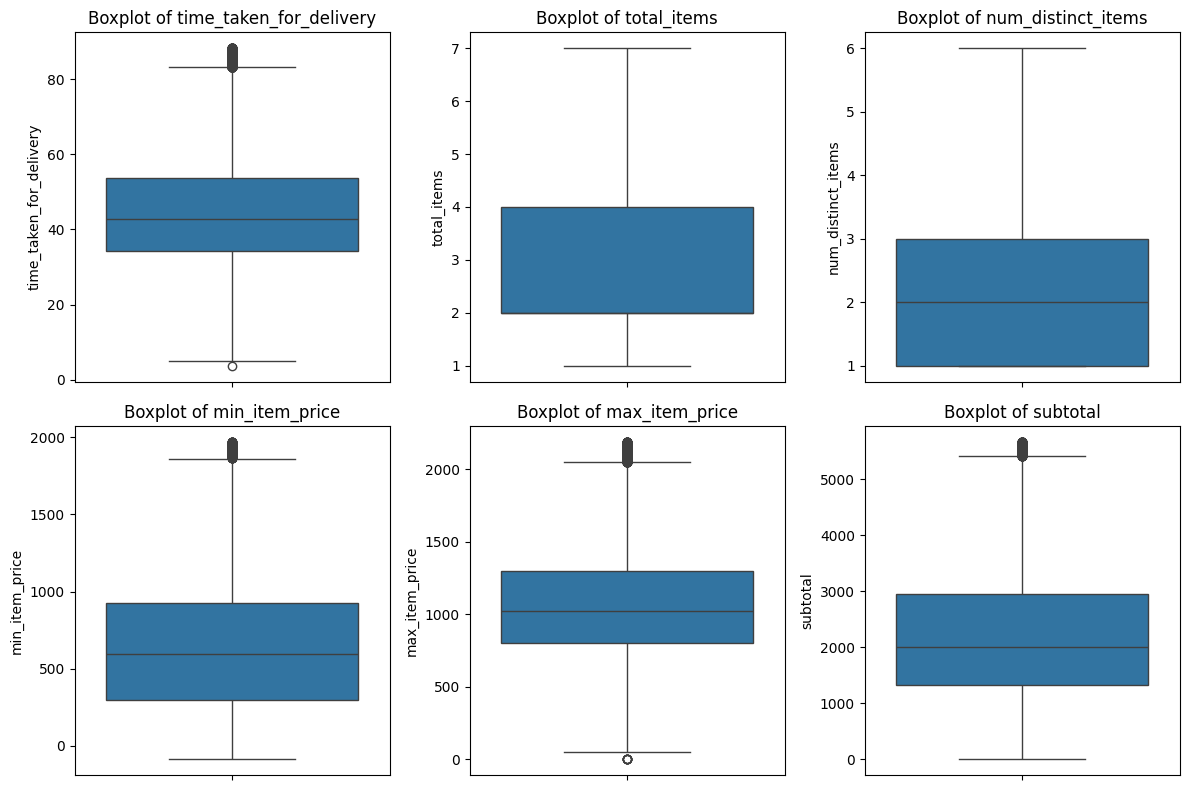

In [ ]:

# removing outliers using IQR

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Now plot the boxplots for the filtered data

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for ax, var in zip(axes, columns):
    sns.boxplot(data=df, y=var, ax=ax)
    ax.set_title(f'Boxplot of {var}')
    ax.set_ylabel(var)

plt.tight_layout()
plt.show()

#Data visualization

<Axes: >

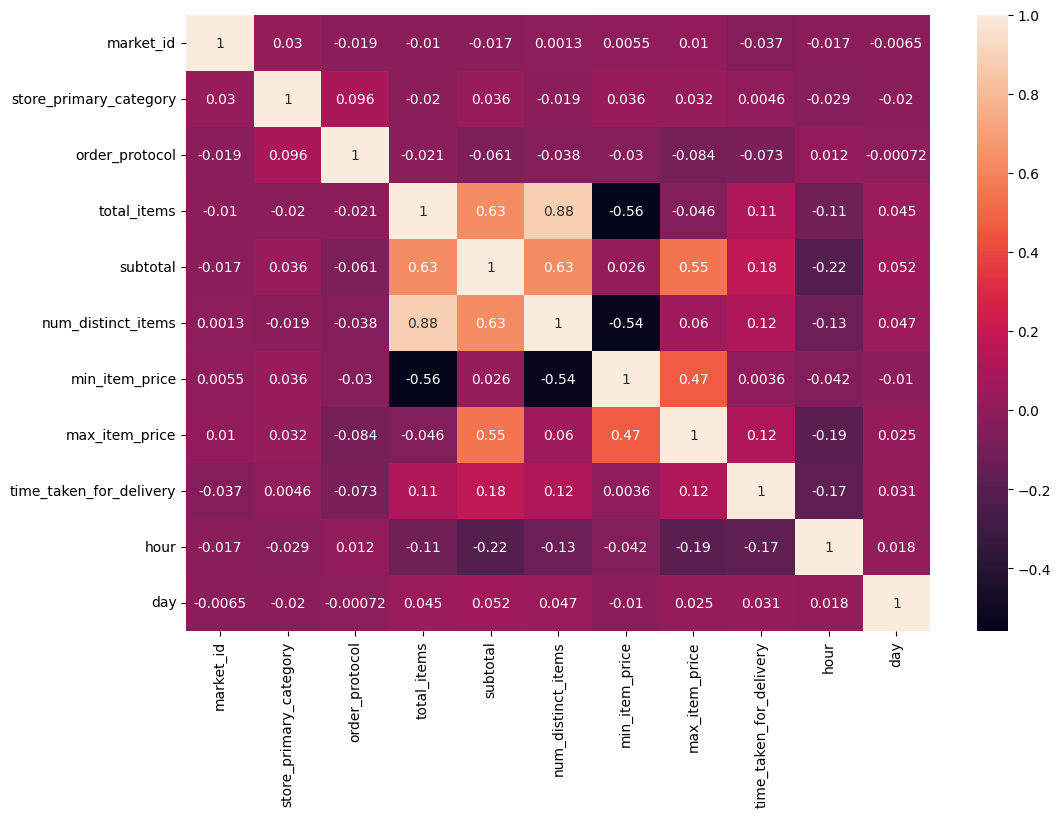

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='market_id', ylabel='total_items'>

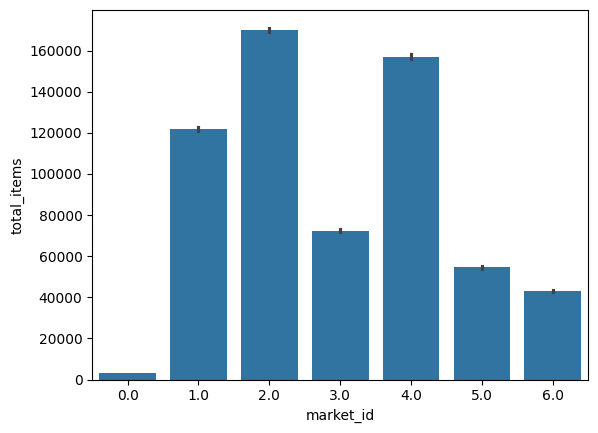

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y='total_items',x='market_id',data=df,estimator='sum')

<Axes: xlabel='hour', ylabel='count'>

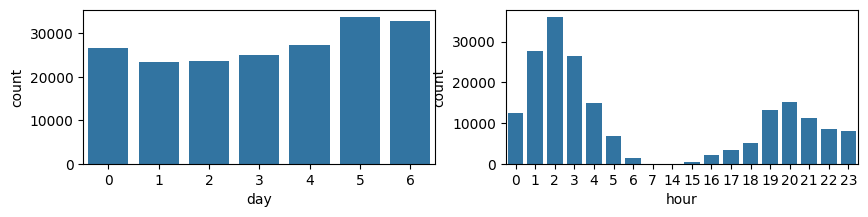

In [ ]:

plt.figure(figsize=(10,2))
plt.subplot(121)
sns.countplot(x=df['day'])
plt.subplot(122)
sns.countplot(x=df['hour'])

#Model Building


In [ ]:
y=df['time_taken_for_delivery']
x=df.drop(['time_taken_for_delivery'],axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
X_train.shape,y_train.shape

((133272, 10), (133272,))

In [ ]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regressor=RandomForestRegressor(n_estimators= 100,random_state=42)
regressor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
regressor.score(X_train,y_train)

0.872673902732515

In [ ]:
# base NN regression model
from keras.regularizers import l2, l1
model = Sequential()

model.add(Dense(128,activation = 'relu',input_shape = (X_train.shape[1],),kernel_regularizer = l2))
model.add(Dense(128,activation = 'relu',kernel_regularizer = l2))
model.add(Dense(64,activation = 'relu',kernel_regularizer = l2))
model.add(Dense(1))

In [ ]:
EarlyStop = tensorflow.keras.callbacks.EarlyStopping(monitor="val_loss",patience=50,restore_best_weights=True)
ModelCheckpoint = tensorflow.keras.callbacks.ModelCheckpoint(filepath="model.keras",monitor="val_loss",save_best_only=True, mode="min")

In [ ]:
model.compile(optimizer="adam",loss="mse",metrics = ["mse","mae"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test,y_test),verbose=1,callbacks=[EarlyStop,ModelCheckpoint] )

Epoch 1/30
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 369.8393 - mae: 14.3714 - mse: 367.4463 - val_loss: 202.1333 - val_mae: 11.3140 - val_mse: 200.3271
Epoch 2/30
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 203.4875 - mae: 11.3149 - mse: 201.7696 - val_loss: 201.7710 - val_mae: 11.4046 - val_mse: 200.2445
Epoch 3/30
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 201.2104 - mae: 11.2567 - mse: 199.7393 - val_loss: 202.7458 - val_mae: 11.1132 - val_mse: 201.4137
Epoch 4/30
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 199.2039 - mae: 11.2228 - mse: 197.9018 - val_loss: 199.1697 - val_mae: 11.2821 - val_mse: 197.9695
Epoch 5/30
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 201.5015 - mae: 11.2934 - mse: 200.3325 - val_loss: 197.9071 - val_mae: 11.1248 - val_mse: 196.8236
Epoch 6/30
2083/2083 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 197.6128 - mae: 11.1725 - mse: 196.5498 - val_loss: 199.3953 - val_mae: 11.0899 - val_mse: 198.4041
Epoch 7/30
2083/2083 ━━━━

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 78,725 (307.52 KB)

 Trainable params: 26,241 (102.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 52,484 (205.02 KB)

In [ ]:
# predict on test data

y_pred= model.predict(X_test)

1042/1042 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


In [ ]:
# checking the r2_score of the regression model

r2_score(y_test, y_pred)

0.1416820839336007

In [ ]:
# Evaluate the model on the test set
test_loss, test_mse, test_mae = model.evaluate(X_test, y_test)  # Assign to 3 variables
print(f"Test MSE: {test_mse:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Calculate MAPE separately if needed
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, model.predict(X_test))
print(f"Test MAPE: {test_mape:.4f}")

1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 180.8615 - mae: 10.5922 - mse: 179.3012
Test MSE: 181.6310
Test MAE: 10.6793
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
Test MAPE: 0.2659
